In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	9
float64		column 2	9
float64		column 3	9
int64		column 4	0
float64		column 5	3
float64		column 6	9
float64		column 7	3
float64		column 8	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,759.000000,759.000000,759.000000,768.000000,765.000000,759.000000,765.000000,762.000000
mean,3.841897,120.960474,68.897233,20.536458,79.847059,31.947563,0.471673,33.300525
std,3.359904,32.016421,19.334917,15.952218,115.379939,7.862275,0.331402,11.779187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000
75%,6.000000,140.500000,80.000000,32.000000,127.000000,36.500000,0.626000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

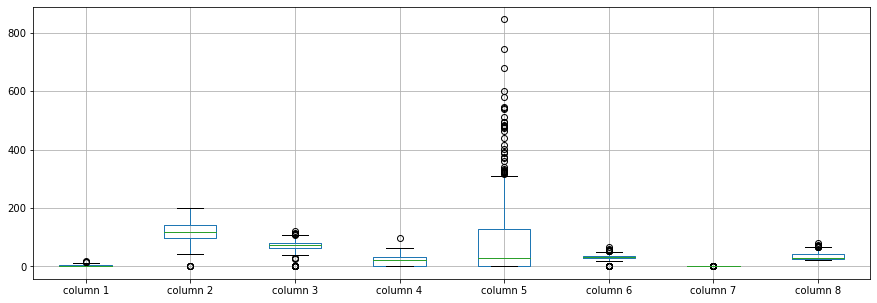

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.841897
column 2    120.960474
column 3     68.897233
column 4     20.536458
column 5     79.847059
column 6     31.947563
column 7      0.471673
column 8     33.300525
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.137046,0.140912,-0.084576,-0.078096,0.024387,-0.032036,0.542977
column 2,0.137046,1.000000,0.147697,0.052595,0.328612,0.232005,0.138328,0.264024
column 3,0.140912,0.147697,1.000000,0.213286,0.098689,0.294227,0.041873,0.230718
column 4,-0.084576,0.052595,0.213286,1.000000,0.435812,0.388316,0.181425,-0.113413
column 5,-0.078096,0.328612,0.098689,0.435812,1.000000,0.202667,0.182243,-0.044628
column 6,0.024387,0.232005,0.294227,0.388316,0.202667,1.000000,0.139929,0.041436
column 7,-0.032036,0.138328,0.041873,0.181425,0.182243,0.139929,1.000000,0.031578
column 8,0.542977,0.264024,0.230718,-0.113413,-0.044628,0.041436,0.031578,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+32,8+32+32,8+32+32+32,8+32+32+32+32,8+32+32+32+32+32,8+32+32+32+32+32+32,8+32+32+32+32+32,8+32+32+32+32,8+32+32+32,8+32+32,8+32,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 426.7662982940674
Epoch: 1 , loss: 425.4557940165202
Epoch: 2 , loss: 424.1951840718587
Epoch: 3 , loss: 424.0772298177083
Epoch: 4 , loss: 421.48327445983887
Epoch: 5 , loss: 418.73387654622394
Epoch: 6 , loss: 416.06035741170246
Epoch: 7 , loss: 409.93783378601074
Epoch: 8 , loss: 405.5769551595052
Epoch: 9 , loss: 399.73241933186847
Epoch: 10 , loss: 398.75240389506024
Epoch: 11 , loss: 387.5917263031006
Epoch: 12 , loss: 387.7276153564453
Epoch: 13 , loss: 381.25158437093097
Epoch: 14 , loss: 373.09775988260907
Epoch: 15 , loss: 371.86341094970703
Epoch: 16 , loss: 364.0042158762614
Epoch: 17 , loss: 363.1502316792806
Epoch: 18 , loss: 356.83932876586914
Epoch: 19 , loss: 350.82284863789874
Epoch: 20 , loss: 340.363379796346
Epoch: 21 , loss: 342.58803685506183
Epoch: 22 , loss: 336.5989990234375
Epoch: 23 , loss: 333.27774810791016
Epoch: 24 , loss: 328.13076368967694
Epoch: 25 , loss: 332.94036610

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
766,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(311.933798581892, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.05399977168907753

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_NL_1.xlsx", index=False, header=False)